In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster
import seaborn as sb
sb.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
bank=pd.read_csv('/Users/boris/Desktop/bank-additional.csv',delimiter=';')

In [3]:

bank.dropna(axis=0,subset=['y'],inplace=True)
bank.drop(['contact','duration', 'nr.employed'], axis=1, inplace=True)
mean_campaign=np.mean(bank.campaign.dropna())
bank.campaign.fillna(round(mean_campaign), inplace=True)
bank['cons.price.idx'].fillna(np.mean(bank['cons.price.idx'].dropna()), inplace=True)
bank['cons.conf.idx'].fillna(np.mean(bank['cons.conf.idx'].dropna()), inplace=True)
bank['euribor3m'].fillna(np.mean(bank['euribor3m'].dropna()), inplace=True)
bank['contacted'] = np.where(bank['pdays']==999, 0, 1)
bank.drop(['pdays','previous', 'poutcome','emp.var.rate'], axis=1, inplace=True)
dummies=pd.get_dummies(bank[['housing', 'loan']])
bank['y'] = np.where(bank['y']=='no', 0, 1)
bank_prepared=bank.join(dummies)
numerical=bank_prepared.select_dtypes(exclude=['object'])
numerical.head()

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,30,2.0,92.893,-46.2,1.313,0,0,0,0,1,1,0,0
1,39,4.0,93.994,-36.4,4.855,0,0,1,0,0,1,0,0
2,25,1.0,94.465,-41.8,4.962,0,0,0,0,1,1,0,0
3,38,3.0,94.465,-41.8,4.959,0,0,0,1,0,0,1,0
4,47,1.0,93.200,-42.0,4.191,0,0,0,0,1,1,0,0


In [4]:
k_means = cluster.KMeans(n_clusters=10)
k_means.fit(numerical)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
k_means.labels_
#cluster number for each sample

array([3, 1, 4, ..., 3, 0, 6], dtype=int32)

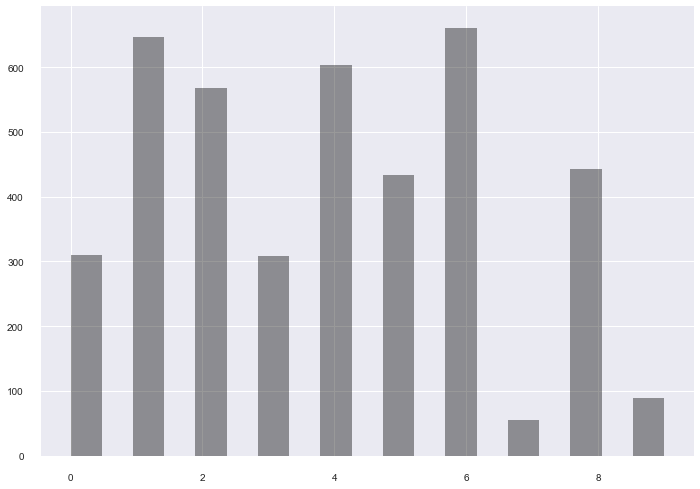

In [6]:
sb.distplot(k_means.labels_, kde=False,color='Black')
sb.despine(offset=10, trim=True)

In [7]:
k_means.cluster_centers_

array([[  5.52741935e+01,   2.48387097e+00,   9.35133581e+01,
         -3.52667742e+01,   3.84488065e+00,   1.45161290e-01,
          5.16129032e-02,   4.38709677e-01,   3.54838710e-02,
          5.25806452e-01,   8.00000000e-01,   3.54838710e-02,
          1.64516129e-01],
       [  3.37125193e+01,   2.14837713e+00,   9.35600665e+01,
         -3.53851623e+01,   4.08340340e+00,   1.14374034e-01,
          5.10046368e-02,   4.68315301e-01,   2.78207110e-02,
          5.03863988e-01,   8.09891808e-01,   2.78207110e-02,
          1.62287481e-01],
       [  4.46197183e+01,   2.28345070e+00,   9.35549965e+01,
         -4.37959445e+01,   3.34570775e+00,   8.27464789e-02,
          1.76056338e-02,   4.36619718e-01,   2.81690141e-02,
          5.35211268e-01,   8.01056338e-01,   2.81690141e-02,
          1.70774648e-01],
       [  2.94627832e+01,   2.19093851e+00,   9.30554142e+01,
         -4.68271845e+01,   1.31383172e+00,   1.42394822e-01,
          3.88349515e-02,   4.14239482e-01,   2.265

In [8]:
cluster_representatives=pd.DataFrame(k_means.cluster_centers_, columns= numerical.columns, index = range(1,11))
cluster_representatives

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
1,55.274194,2.483871,93.513358,-35.266774,3.844881,0.145161,5.161290e-02,0.438710,0.035484,0.525806,0.800000,0.035484,0.164516
2,33.712519,2.148377,93.560066,-35.385162,4.083403,0.114374,5.100464e-02,0.468315,0.027821,0.503864,0.809892,0.027821,0.162287
3,44.619718,2.283451,93.554996,-43.795945,3.345708,0.082746,1.760563e-02,0.436620,0.028169,0.535211,0.801056,0.028169,0.170775
4,29.462783,2.190939,93.055414,-46.827184,1.313832,0.142395,3.883495e-02,0.414239,0.022654,0.563107,0.828479,0.022654,0.148867
5,28.427861,2.243781,93.822757,-40.759198,4.208541,0.121061,4.477612e-02,0.451078,0.028192,0.520730,0.789386,0.028192,0.182421
6,54.549654,2.533487,93.621467,-43.443649,3.537654,0.129330,4.387991e-02,0.464203,0.013857,0.521940,0.812933,0.013857,0.173210
7,36.428139,2.178517,93.549989,-43.481543,3.402169,0.075643,2.269289e-02,0.435703,0.027231,0.537065,0.824508,0.027231,0.148260
8,73.890909,1.818182,93.306691,-36.812727,0.898218,0.454545,2.181818e-01,0.472727,0.018182,0.509091,0.836364,0.018182,0.145455
9,44.708804,2.503386,93.680402,-35.879684,4.454364,0.081264,3.611738e-02,0.449210,0.022573,0.528217,0.835214,0.022573,0.142212
10,34.719101,13.528090,93.969899,-39.802247,4.846416,0.011236,-3.469447e-17,0.415730,0.011236,0.573034,0.865169,0.011236,0.123596


In [9]:
from sklearn.preprocessing import normalize 

In [10]:
normalized_numerical = normalize(numerical,norm='max', axis=0)

In [11]:
help(normalize)

Help on function normalize in module sklearn.preprocessing.data:

normalize(X, norm='l2', axis=1, copy=True, return_norm=False)
    Scale input vectors individually to unit norm (vector length).
    
    Read more in the :ref:`User Guide <preprocessing_normalization>`.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape [n_samples, n_features]
        The data to normalize, element by element.
        scipy.sparse matrices should be in CSR format to avoid an
        un-necessary copy.
    
    norm : 'l1', 'l2', or 'max', optional ('l2' by default)
        The norm to use to normalize each non zero sample (or each non-zero
        feature if axis is 0).
    
    axis : 0 or 1, optional (1 by default)
        axis used to normalize the data along. If 1, independently normalize
        each sample, otherwise (if 0) normalize each feature.
    
    copy : boolean, optional, default True
        set to False to perform inplace row normalization and avoid a
       

In [12]:
normalized_numerical

array([[ 0.34090909,  0.05714286,  0.98022518, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.44318182,  0.11428571,  0.99184315, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.28409091,  0.02857143,  0.99681324, ...,  1.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.30681818,  0.05714286,  0.98022518, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.65909091,  0.02857143,  0.98603944, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.38636364,  0.02857143,  0.98346471, ...,  1.        ,
         0.        ,  0.        ]])

In [13]:
help(normalize)

Help on function normalize in module sklearn.preprocessing.data:

normalize(X, norm='l2', axis=1, copy=True, return_norm=False)
    Scale input vectors individually to unit norm (vector length).
    
    Read more in the :ref:`User Guide <preprocessing_normalization>`.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape [n_samples, n_features]
        The data to normalize, element by element.
        scipy.sparse matrices should be in CSR format to avoid an
        un-necessary copy.
    
    norm : 'l1', 'l2', or 'max', optional ('l2' by default)
        The norm to use to normalize each non zero sample (or each non-zero
        feature if axis is 0).
    
    axis : 0 or 1, optional (1 by default)
        axis used to normalize the data along. If 1, independently normalize
        each sample, otherwise (if 0) normalize each feature.
    
    copy : boolean, optional, default True
        set to False to perform inplace row normalization and avoid a
       

In [14]:
k_means_normalized = cluster.KMeans(n_clusters =10)
k_means_normalized.fit(normalized_numerical)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
cluster_representatives=pd.DataFrame(k_means_normalized.cluster_centers_, columns= numerical.columns)
cluster_representatives

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,0.450102,0.058791,0.981327,1.622978,0.240173,-1.124101e-15,0.064103,-4.773959e-15,5.204170e-17,1.000000e+00,1.000000e+00,5.204170e-17,6.938894e-16
1,0.459708,0.083129,0.990499,1.465768,0.954919,-1.415534e-15,0.000962,1.000000e+00,5.204170e-17,1.143530e-14,1.000000e+00,5.204170e-17,-2.636780e-15
2,0.444549,0.072718,0.989565,1.470666,0.949088,4.887218e-02,0.003759,7.216450e-16,4.857226e-17,1.000000e+00,-2.775558e-15,4.857226e-17,1.000000e+00
3,0.449134,0.072925,0.988053,1.494707,0.742113,8.571429e-02,0.038095,6.661338e-16,1.000000e+00,7.771561e-16,-2.220446e-16,1.000000e+00,3.608225e-16
4,0.454411,0.080213,0.989813,1.467210,0.951440,-1.429412e-15,0.001817,-9.714451e-15,5.204170e-17,1.000000e+00,1.000000e+00,5.204170e-17,-3.247402e-15
5,0.454590,0.068166,0.988542,1.493633,0.762135,9.448819e-02,0.035433,1.000000e+00,4.857226e-17,-1.776357e-15,-2.664535e-15,4.857226e-17,1.000000e+00
6,0.474490,0.055831,0.985282,1.482323,0.387861,1.000000e+00,0.234694,7.216450e-16,4.510281e-17,1.000000e+00,1.000000e+00,4.510281e-17,5.551115e-16
7,0.473315,0.057464,0.986578,1.488973,0.465059,1.000000e+00,0.202247,1.000000e+00,4.510281e-17,-6.661338e-16,1.000000e+00,4.510281e-17,5.273559e-16
8,0.471275,0.060714,0.980597,1.586070,0.238826,2.152778e-01,0.097222,6.661338e-16,4.510281e-17,1.000000e+00,-1.332268e-15,4.510281e-17,1.000000e+00
9,0.443182,0.059323,0.981587,1.607771,0.236152,-9.575674e-16,0.046322,1.000000e+00,5.204170e-17,-2.553513e-15,1.000000e+00,5.204170e-17,6.661338e-16


In [16]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [17]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 18]

for n_clusters in range_n_clusters:
    k_means_normalized = cluster.KMeans(n_clusters=n_clusters, random_state=100)
    cluster_labels = k_means_normalized.fit_predict(normalized_numerical)
    silhouette_avg = silhouette_score(normalized_numerical, cluster_labels)
    print("For n_clusters =", n_clusters, "the average silhouette_score is :", silhouette_avg)

For n_clusters = 2 the average silhouette_score is : 0.466255026783
For n_clusters = 3 the average silhouette_score is : 0.532492238147
For n_clusters = 4 the average silhouette_score is : 0.578888269585
For n_clusters = 5 the average silhouette_score is : 0.608103537032
For n_clusters = 6 the average silhouette_score is : 0.579905768078
For n_clusters = 7 the average silhouette_score is : 0.567125137882
For n_clusters = 8 the average silhouette_score is : 0.597136612194
For n_clusters = 9 the average silhouette_score is : 0.623509929054
For n_clusters = 10 the average silhouette_score is : 0.621458348701
For n_clusters = 11 the average silhouette_score is : 0.631616100948
For n_clusters = 12 the average silhouette_score is : 0.639023362863
For n_clusters = 13 the average silhouette_score is : 0.645968446313
For n_clusters = 15 the average silhouette_score is : 0.57030719609
For n_clusters = 18 the average silhouette_score is : 0.58339554062


In [46]:
k_means_normalized = cluster.KMeans(n_clusters =5)
k_means_normalized.fit(normalized_numerical)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
cluster_representatives=pd.DataFrame(k_means_normalized.cluster_centers_, columns= numerical.columns)
cluster_representatives

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,0.455498,0.071825,0.987060,1.510191,0.700259,0.111048,0.044193,-1.110223e-14,-9.714451e-16,1.000000e+00,1.000000e+00,-9.714451e-16,-7.049916e-15
1,0.457408,0.074729,0.987993,1.501277,0.733339,0.112374,0.034091,1.000000e+00,-6.834810e-16,1.576517e-14,1.000000e+00,-6.834810e-16,-6.356027e-15
2,0.453936,0.068502,0.986415,1.511198,0.699630,0.107317,0.036585,-3.497203e-15,5.204170e-17,1.000000e+00,3.330669e-15,5.204170e-17,1.000000e+00
3,0.454590,0.068166,0.988542,1.493633,0.762135,0.094488,0.035433,1.000000e+00,4.857226e-17,-1.776357e-15,-2.664535e-15,4.857226e-17,1.000000e+00
4,0.449134,0.072925,0.988053,1.494707,0.742113,0.085714,0.038095,6.661338e-16,1.000000e+00,7.771561e-16,-2.220446e-16,1.000000e+00,3.608225e-16


In [47]:
k_means = cluster.KMeans(n_clusters =5)
k_means.fit(numerical)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
cluster_representatives=pd.DataFrame(k_means.cluster_centers_, columns= numerical.columns)
cluster_representatives

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,42.394759,2.540152,93.651372,-41.074638,3.876101,0.074387,0.020287,0.437870,0.030431,0.531699,0.814032,0.030431,0.155537
1,32.254876,2.539662,93.583173,-35.470741,4.026823,0.118336,0.063719,0.461638,0.026008,0.512354,0.808843,0.026008,0.165150
2,71.985294,1.897059,93.228971,-36.645588,0.895191,0.455882,0.205882,0.441176,0.014706,0.544118,0.838235,0.014706,0.147059
3,53.641256,2.526906,93.591689,-39.732735,3.772332,0.126682,0.042601,0.464126,0.020179,0.515695,0.812780,0.020179,0.167040
4,31.091211,2.567164,93.518111,-43.916083,3.154865,0.106136,0.029022,0.432007,0.024876,0.543118,0.814262,0.024876,0.160862


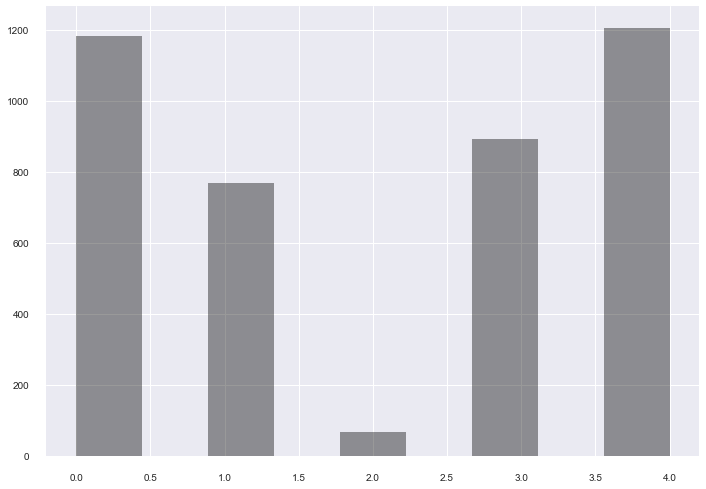

In [49]:
sb.distplot(k_means.labels_, kde=False, norm_hist=False, color='Black')
sb.despine(offset=10, trim=True)

In [23]:
from sklearn import tree

In [24]:
numerical.describe()

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
count,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000
mean,40.115590,2.534483,93.579707,-40.496501,3.621325,0.109519,0.038854,0.446333,0.025498,0.528169,0.813259,0.025498,0.161243
std,10.313839,2.565376,0.579272,4.593404,1.733197,0.312327,0.193270,0.497172,0.157651,0.499266,0.389751,0.157651,0.367800
min,18.000000,1.000000,92.201000,-50.800000,0.635000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,93.075000,-42.700000,1.334000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.000000,2.000000,93.749000,-41.800000,4.857000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,47.000000,3.000000,93.994000,-36.400000,4.961000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,88.000000,35.000000,94.767000,-26.900000,5.045000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
X= numerical.loc[:, {'campaign','cons.price.idx','cons.conf.idx','euribor3m','contacted','housing_yes','loan_yes'}]

In [26]:
X.head(10)

,housing_yes,contacted,cons.price.idx,cons.conf.idx,euribor3m,campaign,loan_yes
0,1,0,92.893,-46.2,1.313,2.0,0
1,0,0,93.994,-36.4,4.855,4.0,0
2,1,0,94.465,-41.8,4.962,1.0,0
3,0,0,94.465,-41.8,4.959,3.0,0
4,1,0,93.200,-42.0,4.191,1.0,0
5,0,0,94.199,-37.5,0.884,3.0,0
6,1,0,94.199,-37.5,0.879,4.0,0
7,1,0,93.200,-42.0,4.191,2.0,0
8,0,0,93.200,-42.0,4.153,1.0,0
9,0,0,93.994,-36.4,4.855,1.0,0


In [27]:
y=numerical.y

In [28]:
y.name

'y'

In [29]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: y, dtype: int64

In [50]:
clf = tree.DecisionTreeClassifier(criterion="gini",
                                  #splitter="best",max_features=4,min_weight_fraction_leaf=0.5,
                                  class_weight="balanced"
                                  
                                 )

In [63]:
#clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

In [52]:
!pip install graphviz

In [53]:
import graphviz

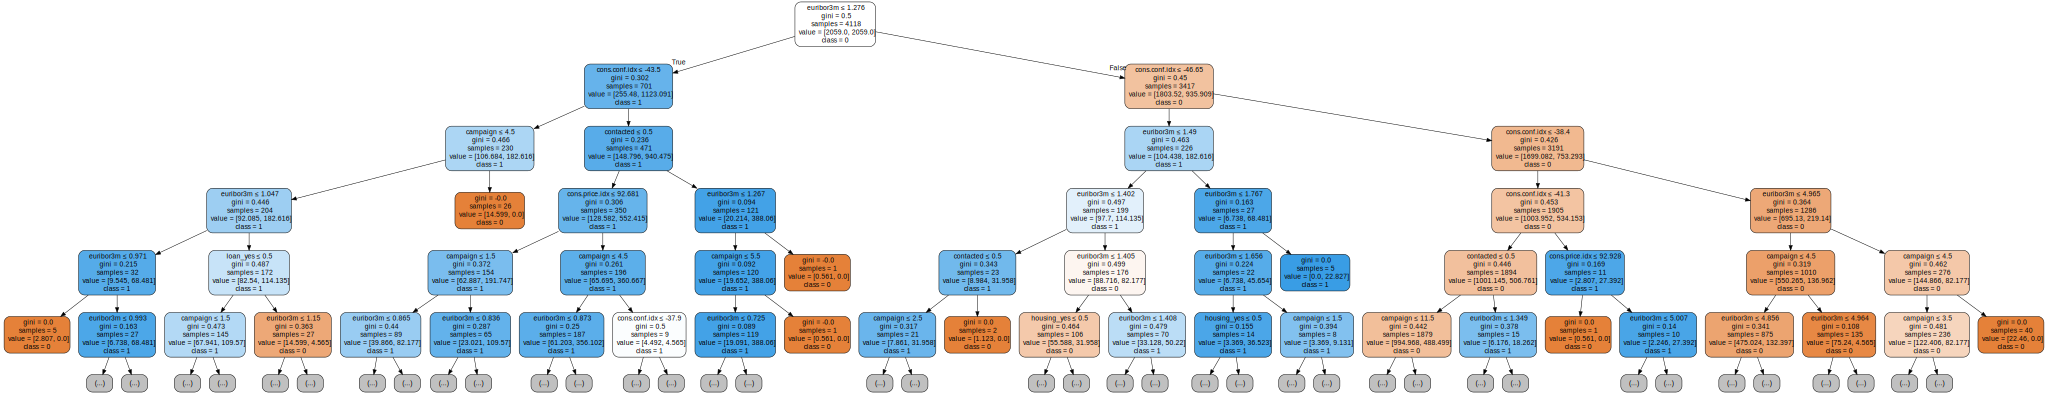

In [34]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,
                                max_depth=5,
                         class_names=['0','1'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [35]:
graph.render('/Users/boris/Desktop/test1')

'/Users/boris/Desktop/test1.pdf'

In [36]:
from scipy.stats import randint

In [37]:
from sklearn.tree import export_graphviz
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn.cross_validation import  cross_val_score
from scipy.stats import randint

/Users/boris/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/boris/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [38]:
param_dist = {"criterion": ["gini"],
                  "min_samples_split": randint(1, 20),
                  "max_depth": randint(5, 10),
                  "min_samples_leaf": randint(1, 20),
                  "max_leaf_nodes": randint(10, 20)}

In [54]:
random_search = RandomizedSearchCV(clf,
                                       param_distributions=param_dist,
                                   scoring='roc_auc',
                                       n_iter=100)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [41]:
from scipy.stats import logistic

In [42]:
logistic.cdf(X_train)

array([[ 0.5       ,  0.5       ,  1.        , ...,  0.99227087,
         0.88079708,  0.5       ],
       [ 0.5       ,  0.5       ,  1.        , ...,  0.98452601,
         0.73105858,  0.73105858],
       [ 0.73105858,  0.5       ,  1.        , ...,  0.99305663,
         0.99330715,  0.5       ],
       ..., 
       [ 0.5       ,  0.5       ,  1.        , ...,  0.99230149,
         0.99752738,  0.5       ],
       [ 0.5       ,  0.5       ,  1.        , ...,  0.99307728,
         0.99999386,  0.5       ],
       [ 0.73105858,  0.5       ,  1.        , ...,  0.9922862 ,
         0.73105858,  0.5       ]])

In [61]:
from sklearn import metrics
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n")

    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y,y_pred),"\n")
        
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y,y_pred),"\n")
        
measure_performance(X_train,y_train,clf, show_confusion_matrix=True)

Accuracy:0.859 

Classification report
             precision    recall  f1-score   support

          0       0.99      0.85      0.91      2929
          1       0.44      0.91      0.59       365

avg / total       0.93      0.86      0.88      3294
 

Confusion matrix
[[2497  432]
 [  32  333]] 



In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
X_train.shape[0]

In [ ]:
from sklearn.cross_validation import  cross_val_score

In [56]:
clf_dt=tree.DecisionTreeClassifier(criterion="gini",class_weight="balanced",max_depth=3,min_samples_leaf=5,
                                  splitter="best")
clf_dt.fit(X_train,y_train)
measure_performance(X_train,y_train,clf_dt)

Accuracy:0.824 

Classification report
             precision    recall  f1-score   support

          0       0.94      0.85      0.90      2929
          1       0.33      0.58      0.42       365

avg / total       0.87      0.82      0.84      3294
 

Confusion matrix
[[2502  427]
 [ 153  212]] 



In [ ]:
results = {}

In [ ]:
# Perform 6-fold cross validation
scores = cross_val_score(clf_dt, X_train, y_train, cv=20)
print (scores)

In [64]:
clf_dt=tree.DecisionTreeClassifier(criterion="gini",class_weight="balanced",max_depth=3,min_samples_leaf=5,
                                  splitter="best")
clf_dt.fit(X_test,y_test)
measure_performance(X_test,y_test,clf_dt)

Accuracy:0.854 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.87      0.91       738
          1       0.40      0.74      0.52        86

avg / total       0.91      0.85      0.87       824
 

Confusion matrix
[[640  98]
 [ 22  64]] 

